In [88]:
# import python libraries
import plotly.express as px
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [35]:
df= pd.read_csv("Diwali.csv",header= 0, encoding= 'unicode_escape')

In [36]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [37]:
#check for how many columns and rows
df.shape

(11251, 15)

In [38]:
#check the unique ID
df["User_ID"].unique()

array([1002903, 1000732, 1001990, ..., 1001542, 1004378, 1005258],
      dtype=int64)

In [39]:
#let check the number of null values in the dataset
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [40]:
#let drop columns with more than 50% null values

df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [41]:
df.sample(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
5113,1005068,Hoffman,P00302842,F,36-45,41,0,Jharkhand,Eastern,Healthcare,Clothing & Apparel,2,8675.0
611,1000808,Kasheen,P00181342,F,26-35,32,1,Uttar Pradesh,Central,IT Sector,Food,2,19457.0
6036,1002902,McMath,P00137242,F,26-35,29,1,Telangana,Southern,Chemical,Electronics & Gadgets,2,7976.0
10103,1002605,Sally,P00028042,F,36-45,41,0,Uttar Pradesh,Central,Media,Clothing & Apparel,4,3426.0
5577,1005824,Eva,P00206442,F,18-25,19,1,Maharashtra,Western,Banking,Electronics & Gadgets,1,8126.0


In [43]:
#check for general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [44]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [46]:
df["Amount"].mean()

9453.610857727557

In [47]:
#let drop null values
sales = df.dropna()

In [48]:
sales.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [49]:
#let change the amount from float to int

sales["Amount"] = sales["Amount"].astype('int64')

C:\Users\35191\AppData\Local\Temp\ipykernel_12828\606515802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["Amount"] = sales["Amount"].astype('int64')


In [50]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [51]:
#make a copy of the original dataset
sale = sales.copy()

# Exploratory Data Analysis


In [52]:
#let describe some numerical values

sale[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [53]:
#let check the top 10 products on sales in the city

sale["Product_Category"].value_counts().nlargest(10)

Product_Category
Clothing & Apparel       2655
Food                     2490
Electronics & Gadgets    2087
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Name: count, dtype: int64

FROM THE ABOVE ANALYSIS MOST PEOPLE SPENT THEIR MONEY ON CLOTHING & APPAREL, FOOD AND ELECTRONIC GADGETS IN THE COUNTRY

<AxesSubplot: xlabel='Gender'>

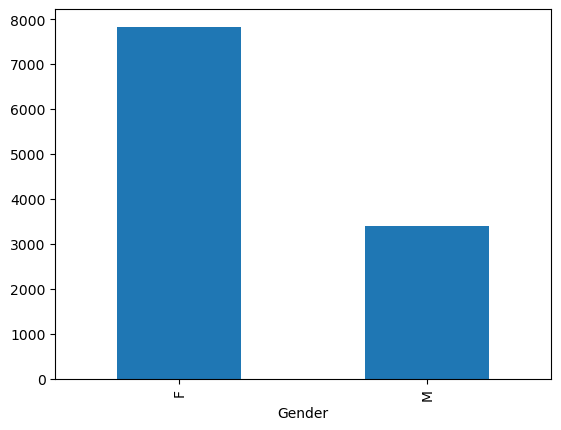

In [54]:
#let check the gender with the most purchasing power in the city
sale["Gender"].value_counts().plot(kind = "bar")

 FROM THE ABOVE ANALSIS IT CAN BE IDENTIFY THAT FEMALES CONSTITUTE THE HIGHEST POPULATION IN THE AREA

<AxesSubplot: xlabel='Age Group'>

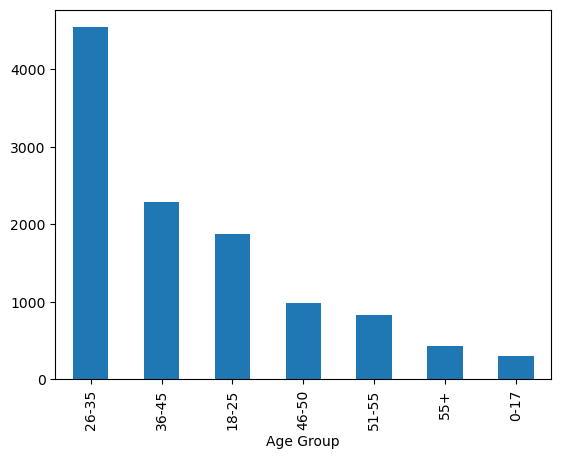

In [55]:
# let check the age group with the most purchese power

sale["Age Group"].value_counts().plot(kind = "bar")

FROM THE ABOVE IT CAN BE OBSERVED THAT 26-35, 36-45 AND 18-25 CONSTITUTE THE AGE GROUPS WITH THE HIGHEST PURCHASING POWER IN THE AREA

In [70]:
#Top 10 product the either male/female spent on in the city
sale_group = sale.groupby(["Gender", "Product_Category"]).count()[["Product_ID"]].reset_index().sort_values(by='Product_ID', ascending=False).head(10)
sale_group

,Gender,Product_Category,Product_ID
3,F,Clothing & Apparel,1854
6,F,Food,1771
5,F,Electronics & Gadgets,1476
21,M,Clothing & Apparel,801
7,F,Footwear & Shoes,782
24,M,Food,719
23,M,Electronics & Gadgets,611
1,F,Beauty,325
11,F,Household items,284
25,M,Footwear & Shoes,277


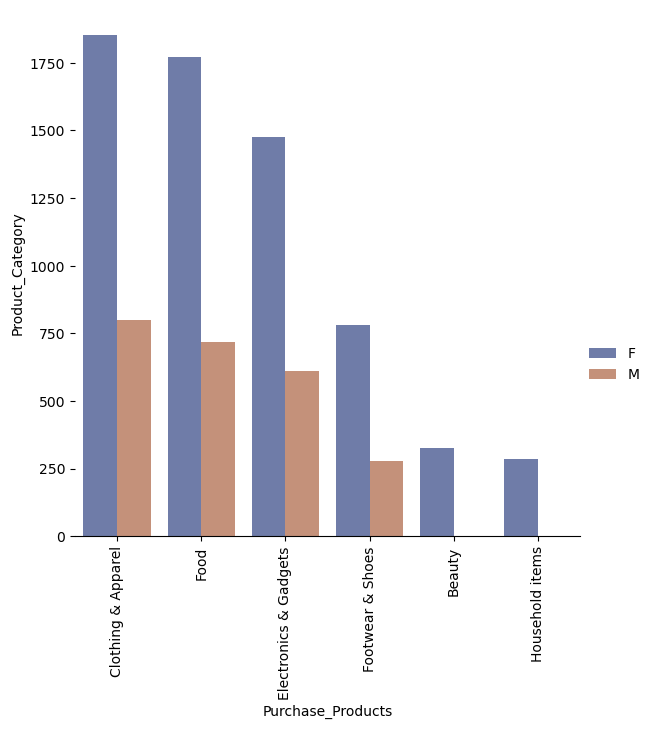

In [77]:
# Plot what each gender spent on
g = sns.catplot(
    data=sale_group, kind="bar",
    x="Product_Category", y="Product_ID", hue="Gender",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
plt.xticks(rotation=90)
g.set_axis_labels("Purchase_Products", "Product_Category")
g.legend.set_title("")

FROM THE ABOVE IT CAN BE OBSERVED THAT FEMALES CONSTITUTE THE HIGHEST PURCHASING POWER AND THEY MOST SPENT ON CLOTHS& APPAREL

In [79]:
#check the various columns
sale.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<AxesSubplot: title={'center': 'Most Occupation in the country'}, xlabel='Occupation'>

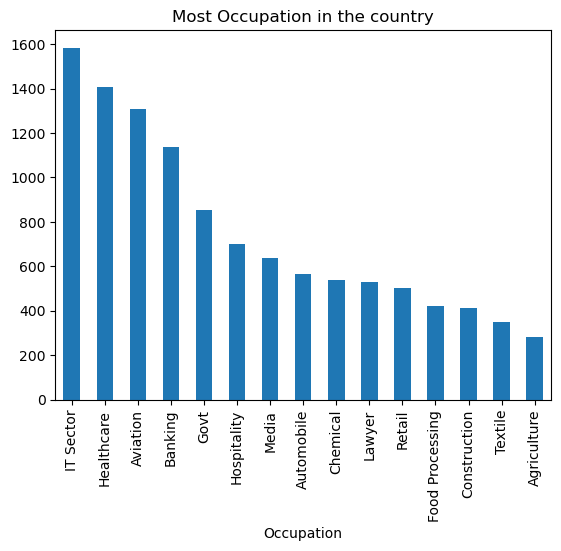

In [150]:
# the major occupation in the country
sale["Occupation"].value_counts().plot(kind = "bar", title = "Most Occupation in the country")

FROM THE ABOVE IT CAN BE OBSERVED THAT THE TOP 3 OCCUPATIONS IN THE COUNTRY ARE IT SECTOR, HEALTHCARE AND AVIATION

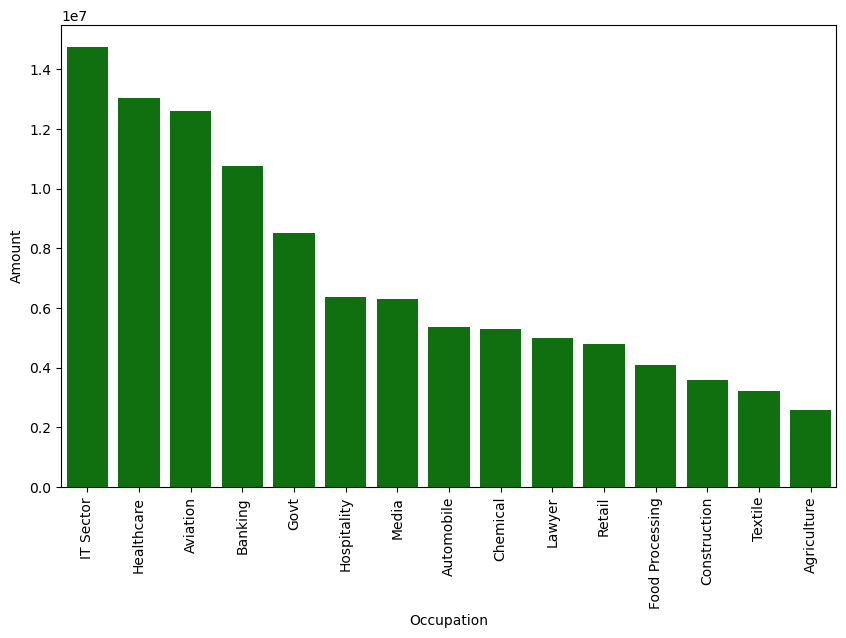

In [104]:
#Occupation and Amount spent
product_occu = sale.groupby('Occupation')["Amount"].sum().reset_index().sort_values(by='Amount', ascending=False)
# Plot the occupation with the most amount spent on
plt.subplots(figsize=(10, 6))
sns.color_palette(palette='BuGn')
sns.barplot(x="Occupation", y="Amount", data=product_occu,
            label="", color="g")

plt.xticks(rotation=90)

# Display the plot
plt.show()

AND MOST OCCUPATION WITH THE HIGHEST PURCHASING POWER IN THE COUNTRY IS THE IT SECTOR, HEALTHCARE AND AVIATION

In [106]:
#change the dtype from int to str
sales["Marital_Status"] = sales["Marital_Status"].astype(str)

C:\Users\35191\AppData\Local\Temp\ipykernel_12828\2069504672.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
# rename the rows in the column
sale["Marital_Status"].replace([0],value = 'Single',inplace=True)
sale["Marital_Status"].replace([1],value = 'Married',inplace=True)

In [113]:
sale.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877


In [114]:
#checking marital status in the country
sale["Marital_Status"].value_counts()

Marital_Status
Single     6518
Married    4721
Name: count, dtype: int64

<AxesSubplot: xlabel='Marital_Status', ylabel='Amount'>

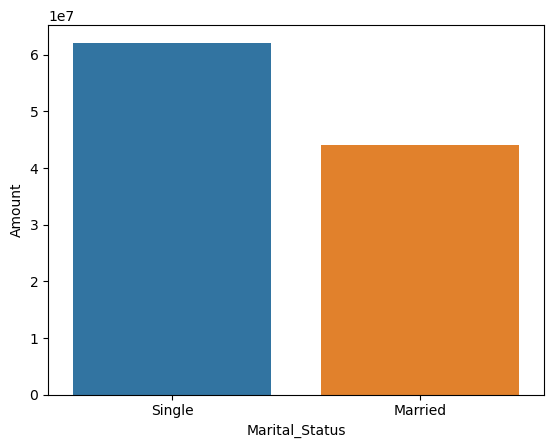

In [118]:
# Total Amount vs Marital Status
sales_age = sale.groupby(['Marital_Status'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Marital_Status',y= 'Amount' ,data = sales_age)

FROM THE ABOVE IT CAN BE OBSERVED THAT SINGLE PEOPLE SPENT MORE THAN MARRIED COUPLES IN THE COUNTRY

In [115]:
#Top 10 product the most people spent on in the countryt
status= sale.groupby(["Marital_Status", "Product_Category"]).count()[["Product_ID"]].reset_index().sort_values(by='Product_ID', ascending=False).head(10)
status

,Marital_Status,Product_Category,Product_ID
21,Single,Clothing & Apparel,1535
24,Single,Food,1500
23,Single,Electronics & Gadgets,1174
3,Married,Clothing & Apparel,1120
6,Married,Food,990
5,Married,Electronics & Gadgets,913
25,Single,Footwear & Shoes,613
7,Married,Footwear & Shoes,446
29,Single,Household items,295
19,Single,Beauty,242


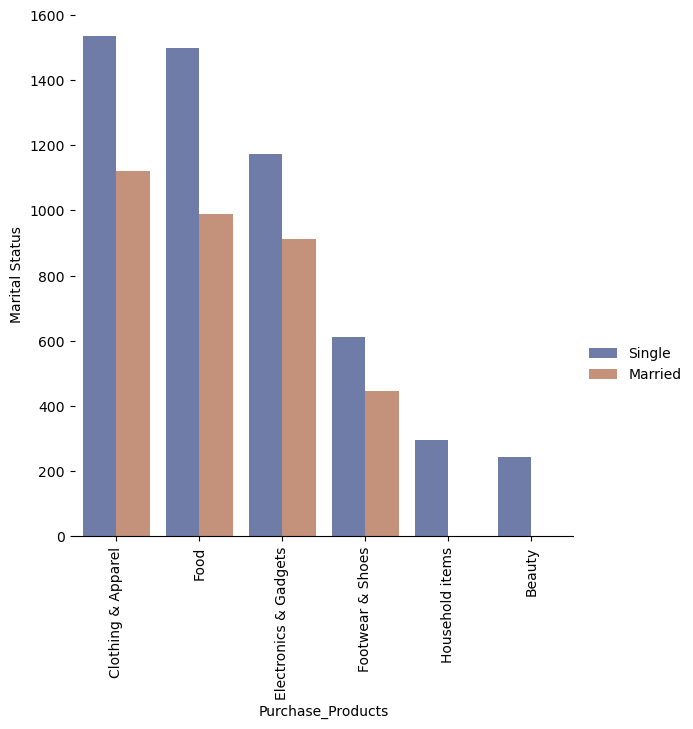

In [116]:
# Draw a nested barplot by product and marital status
g = sns.catplot(
    data=status, kind="bar",
    x="Product_Category", y="Product_ID", hue="Marital_Status",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
plt.xticks(rotation=90)
g.set_axis_labels("Purchase_Products", "Marital Status")
g.legend.set_title("")

IT CAN BE OBSERVE FROM THE ABOVE THAT BOTH MARRIED AND SINGLE PEOPLE SPENT ON THE SAME ITEMS BUT SINGLE PEOPLE SPENT MUCH MORE THAN MARRIED COUPLES

<AxesSubplot: xlabel='Marital_Status', ylabel='Amount'>

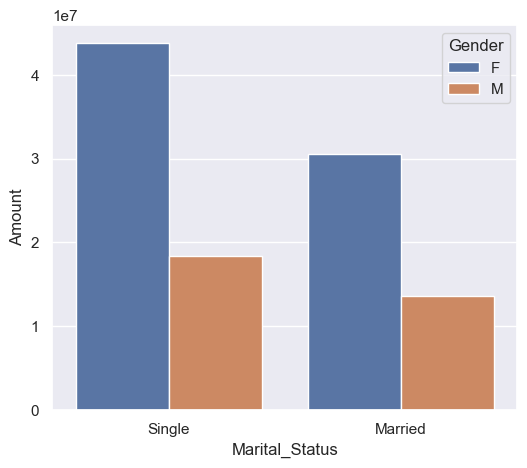

In [152]:
sales_state = sale.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

IT CAN BE SEEN FROM THAT ABOVE CHART THAT MOST BUYER WITH MARRIAGES ARE WOMAN SAME AS SINGLE PEOPLE

In [119]:
sale.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [121]:
# check the state with the most transaction in the country
sale["State"].value_counts()

State
Uttar Pradesh       1944
Maharashtra         1525
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              427
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: count, dtype: int64

In [128]:
#Top 10 product the most state spent on in the country
states= sale.groupby(["State", "Product_Category"]).count()[["Product_ID"]].reset_index().sort_values(by='Product_ID', ascending=False).head(10)
states

,State,Product_Category,Product_ID
214,Uttar Pradesh,Food,567
211,Uttar Pradesh,Clothing & Apparel,490
161,Maharashtra,Food,480
114,Karnataka,Footwear & Shoes,338
37,Delhi,Footwear & Shoes,335
158,Maharashtra,Clothing & Apparel,327
113,Karnataka,Food,302
4,Andhra Pradesh,Electronics & Gadgets,277
81,Himachal Pradesh,Clothing & Apparel,240
213,Uttar Pradesh,Electronics & Gadgets,224


In [130]:
# checking top 10 state with the nmost total spent
sales_state = sale.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


In [132]:
#checking the top 10 state with the most total orders
state_order = sale.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
state_order

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


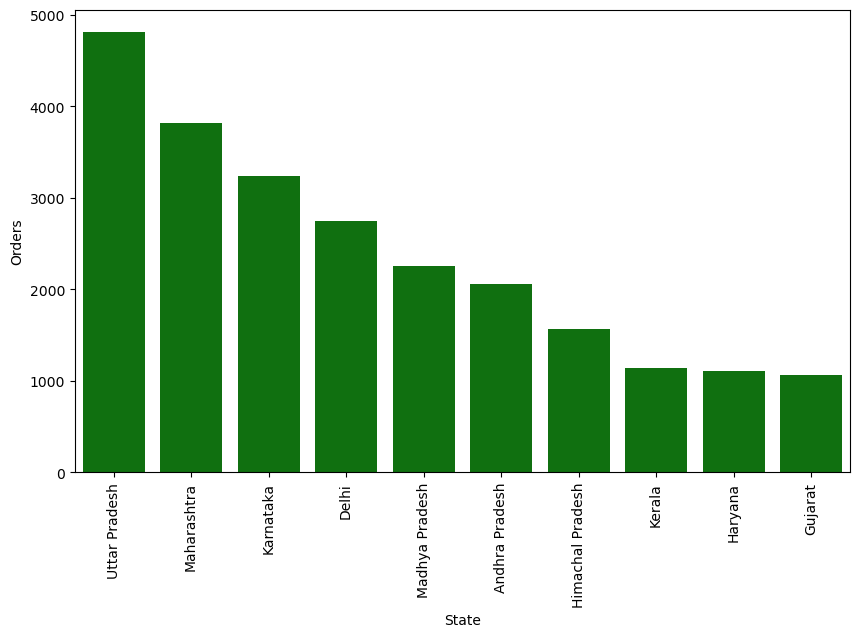

In [135]:
plt.subplots(figsize=(10, 6))
sns.color_palette(palette='BuGn')
sns.barplot(x="State", y="Orders", data = state_order,
            label="Total", color="g")

plt.xticks(rotation=90)

# Display the plot
plt.show()

UTTAR PRADESH, MAHARASHTRA AND KARNATKA ARE THE TOP 3 STATE WITH THE MOST ORDERS AS IT CAN BE SEEN FROM THE CHART ABOVE

In [147]:
#checking the age group and what product the spent on
age= sale.groupby(["Age Group", "Product_Category"]).count()[["Product_ID"]].reset_index().sort_values(by='Product_ID', ascending=False).head(10)
age

,Age Group,Product_Category,Product_ID
37,26-35,Clothing & Apparel,1057
40,26-35,Food,991
39,26-35,Electronics & Gadgets,832
55,36-45,Clothing & Apparel,532
22,18-25,Food,478
19,18-25,Clothing & Apparel,469
58,36-45,Food,454
41,26-35,Footwear & Shoes,424
57,36-45,Electronics & Gadgets,413
21,18-25,Electronics & Gadgets,343


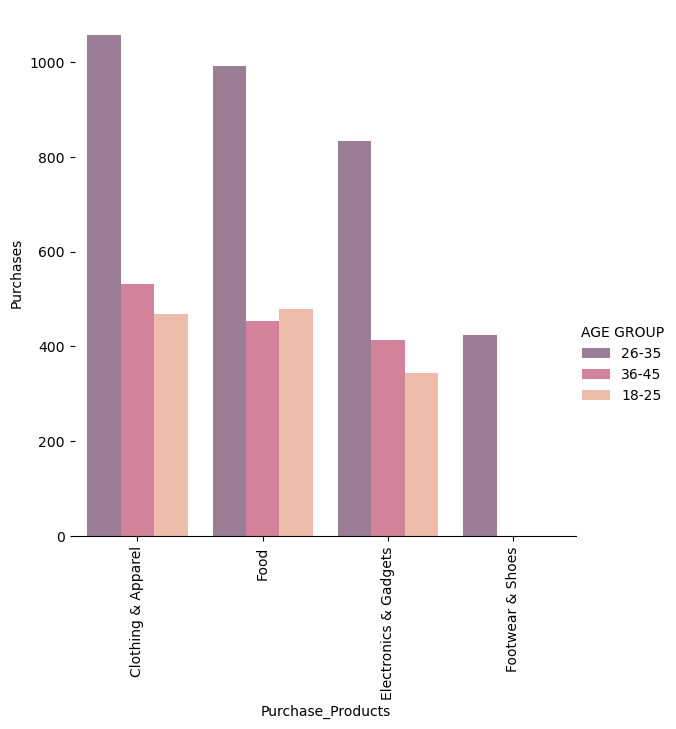

In [149]:
g = sns.catplot(
    data=age, kind="bar",
    x="Product_Category", y="Product_ID", hue="Age Group",
    errorbar="sd", palette="rocket", alpha=.6, height=6
)
g.despine(left=True)
plt.xticks(rotation=90)
g.set_axis_labels("Purchase_Products", "Purchases")
g.legend.set_title("AGE GROUP")

MOST AGE GROUPS SPENT THE MONEY ON CLOTHS, FOOD AND ELECTRONIC GADGETS BUT BETWEEN 26-35 SPENT THE HIGHEST AS IDENTIFY FROM THE CHART ABOVE

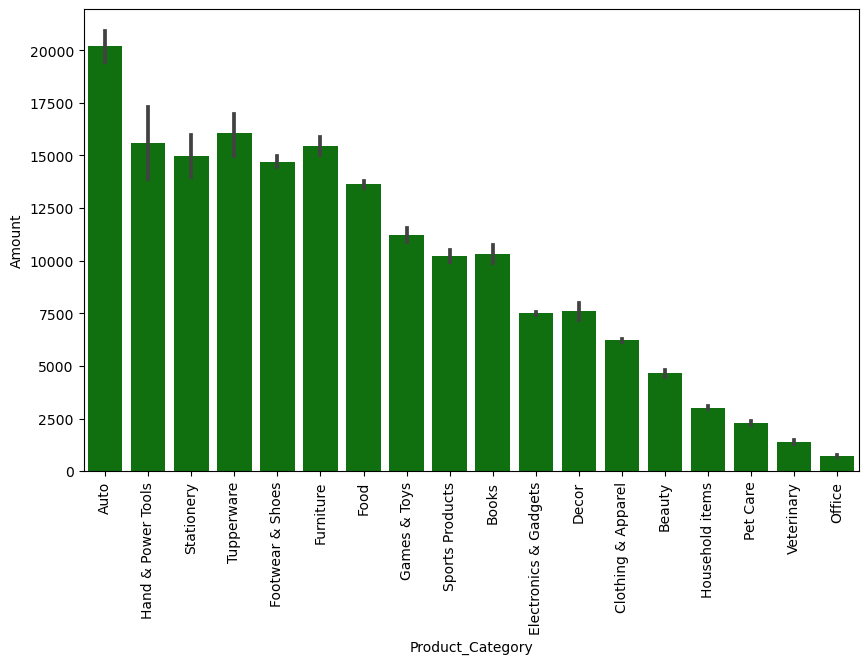

In [78]:
# Plotting product category and the total amount spent on it
plt.subplots(figsize=(10, 6))
sns.color_palette(palette='BuGn')
sns.barplot(x="Product_Category", y="Amount", data = sale,
            label="Total", color="g")

plt.xticks(rotation=90)

# Display the plot
plt.show()

MOST PEOPLE SPENT ON CLOTHS AND FOOD BUT THE MOST EXPENSIVE PRODUCT MOST PEOPLE SPENT ON ARE AUTO, HAND & POWER TOOLS AND TUPPERWARE

IN CONCLUSION IT CAN BE OBSERVE THAT FEMALES HAS THE HIGHEST PURCHASING POWER IN THE COUNTRY EITHER MARRIED OR SINGLE AND THEY MOSTLY BUT CLOTHING, APPAREL AND FOOD, ALSO UTTAR PRADES, MAHARASHTRA AND KARNATAKA ARE THE TOP THREE STATE WITH THE MOST ORDERS. MOREOVER THE TAGET GROUP FOR ANY INVESTOR SHOULD BE 26-35 SINCE THEY CONSTITUTE THE AGE GROUP WITH THE HIGHEST PURCHASING POWER.